# Tema 3: Evaluación de algortimos de clasificación
## Cuaderno de ejercicios

**Ejercicio 1**

Supongamos que hemos utilizado un clasificador, por ejemplo, Naive Bayes, para clasificar documentos con respecto al sentimiento. Las clases son Pos (positivo), Neg (negativo) y Neu (neutro). Probamos nuestro clasificador en 10 documentos para los que conocemos su _gold standar_ (clase real). La prueba tiene los siguientes resultados:

| Documento | Clase Real | Clase predicha |
| ------------- | ------------- | ------------- |
| d1  | Pos  | Pos |
| d2  | Pos  | Pos |
| d3  | Pos  | Pos |
| d4  | Pos  | Neu |
| d5  | Neg  | Neg |
| d6  | Neg  | Neu |
| d7  | Neg  | Neg |
| d8  | Neu  | Pos |
| d9  | Neu  | Neu |
| d10  | Neu  | Neu |

Calcular: precision, recall, accuracy y F1 para estos resultados de clasificación para las tres clases.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
Documento = ['d1','d2','d3','d4','d5','d6','d7','d8','d9','d10']
Real = ['Pos', 'Pos', 'Pos', 'Pos', 'Neg', 'Neg', 'Neg', 'Neu', 'Neu', 'Neu']
Predicho = ['Pos', 'Pos', 'Pos', 'Neu', 'Neg', 'Neu', 'Neg', 'Pos', 'Neu', 'Neu']

datos = pd.DataFrame({"Documento":Documento, "Real":Real, "Predicho":Predicho})
datos.head(5)

,Documento,Real,Predicho
0,d1,Pos,Pos
1,d2,Pos,Pos
2,d3,Pos,Pos
3,d4,Pos,Neu
4,d5,Neg,Neg


In [27]:
## Matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Real, Predicho, labels=["Pos", "Neg", "Neu"])
cm

array([[3, 0, 1],
       [0, 2, 1],
       [1, 0, 2]], dtype=int64)

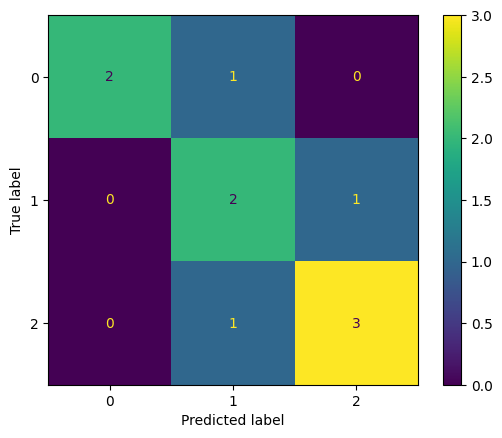

In [52]:
## Graficamos la Matriz de confusion 
confusion_matrix = metrics.confusion_matrix(Real, Predicho)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [76]:
### Para obtener Metricas como el F1-Score, La presicion, Recall y el Accuracy se puede obtener usuando las formulas o las funciones de Pytho.
### Primero con las formulas usando la propia matriz de confusion
print(f"La matriz de confusion es: \n {cm}")

## El accurracy para matriz multiclase es la suma de la diagonal entre todos los elementos de la matriz
accuracy = sum(np.diag(cm))/np.sum(cm)
print(f"El Accuracy es : {accuracy}")

### Para calcular la precision por otro lado usamos 
precision = np.diag(cm) / np.sum(cm,axis=0)
print(f"La precision por otro lado es : \n {precision}")
### El recall es 
recall = (np.diag(cm) / np.sum(cm,axis=1))
print(f"EL recall por otro lado es : \n {recall}")

f1_score = 2*precision*recall/(precision+recall)
print(f"EL f1-score por otro lado es : \n {f1_score}")


La matriz de confusion es: 
 [[3 0 1]
 [0 2 1]
 [1 0 2]]
El Accuracy es : 0.7
La precision por otro lado es : 
 [0.75 1.   0.5 ]
EL recall por otro lado es : 
 [0.75       0.66666667 0.66666667]
EL f1-score por otro lado es : 
 [0.75       0.8        0.57142857]


In [77]:
### Otra forma de realizarlo es usando las mismas funciones de sclearn para clacularlas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


accuracy = accuracy_score(Real, Predicho)
print(f"El Accuracy es : {accuracy}")

precision = precision_score(Real, Predicho, average=None)
print(f"La precision por otro lado es : \n {precision}")

recall = recall_score(Real, Predicho, average=None )
print(f"EL recall por otro lado es : \n {recall}")

f1_score = f1_score(Real, Predicho, average=None)
print(f"EL f1-score por otro lado es : \n {f1_score}")

El Accuracy es : 0.7
La precision por otro lado es : 
 [1.   0.5  0.75]
EL recall por otro lado es : 
 [0.66666667 0.66666667 0.75      ]
EL f1-score por otro lado es : 
 [0.8        0.57142857 0.75      ]


**Ejercicio 2**

Se evaluó un clasificador binario utilizando un conjunto de 1000 ejemplos de prueba (test) en los que el 50 % de todos los ejemplos son negativos. El clasificador tiene 60 % de sensitivity y 70 % de accuracy. Escribe la matriz de confusión.

In [ ]:
n = 1000
positivo = 500
negativo = 500
sensibilidad =0.6
accuracy = 0.7

El problema nos esta diciendo que tiene un 0.6 de sensibilidad y la sensibilidad es:

Sens = TP/TP + FN, el TP son todos los elementos de la clase positiva que marco bien y el FN son todos los elementos de la clase positiva que marco como negativo en total hay 500 observaciones positvas lo que significa

que  TP + FN = 500  y  TP/500 = 0.6 lo que implica que de estos 500 el marco correctamente 300 y 200 los marco mal

ahora  TP + TN + FP + FN es igual 1000 

dice que tiente un accuracy de 0.7 y el acuracy es 

accuraccy = TP + TN/ TP + TN + FP + FN, ya tenemos el TP y el FN 

0.7 = 300 + TN /1000, recordemos que TP + TN + FP + FN es 1000, por lo tanto TN = 0.7 * 1000 - 300 por lo tanto TN = 400 y como TN + FP = 500 entonces FP es igual a 100 la matriz de confusion queda de la siguiente forma.

In [79]:
mc = np.array([[400, 100], [300, 200]])
mc

array([[400, 100],
       [300, 200]])

**Ejercicio 3**

Utilizando la matriz de confusión creada en el ejercicio anterior, calcula la precisión del clasificador, la medida F1 y
especificidad.

In [84]:
TP = 300
FN = 200
TN = 400
FP = 100

accuracy = (TP + TN) /(TP+ FN + TN + FP)
print(f"El Accuracy es : {accuracy}")

recall = TP/(TP+FN)
print(f"EL recall por otro lado es : \n {recall}")

precision = TP/(TP+FP)
print(f"La precision por otro lado es : \n {precision}")

f1_score = 2*precision*recall/(precision+recall)
print(f"EL f1-score por otro lado es : \n {f1_score}")

El Accuracy es : 0.7
EL recall por otro lado es : 
 0.6
La precision por otro lado es : 
 0.75
EL f1-score por otro lado es : 
 0.6666666666666665
